<h1> Music genre prediction [M1_27DS+] </h1>  
<style>
h1 {
  border: dashed white;
  padding: 10px 12px;
  background-color: indigo;
  position: static;
}
</style>

## Table of contents
* [1. Подготовка к работе](#chapter1)
    * [1.1 Загрузка данных и библиотек](#section1_1)
    * [1.2 Настройка окружения](#section1_2)
    * [1.3 Инициализация и описание функций](#section1_3)
* [2. Предобработка данных](#chapter2)
    * [2.1 Дубликаты и пропуски](#section_2_1)
* [3. Исследовательский анализ данных](#chapter3)
    * [3.1 Загрузка данных и библиотек](#section3_1)
    * [3.2 Настройка окружения](#section3_2)
    * [3.3 Инициализация и описание функций](#section3_3)
    * [3.4 Загрузка данных и библиотек](#section3_1)
    * [3.5 Настройка окружения](#section3_2)
    * [3.6 Инициализация и описание функций](#section3_3)
    * [3.7 Загрузка данных и библиотек](#section3_1)
    * [3.8 Настройка окружения](#section3_2)
    * [3.9 Инициализация и описание функций](#section3_3)
* [4. ](#chapter4)
* [5. Общий вывод](#chapter5)
* [Чеклист](#chapter_checklist)

In [12]:
### Chapter 1 <a class="anchor" id="chapter1"></a>

#### Section 1.1 <a class="anchor" id="chapter1.1"></a>

#### Section 1.2 <a class="anchor" id="chapter1.2"></a>

##### Section 1.2.1 <a class="anchor" id="section_1_2_1"></a>

##### Section 1.2.2 <a class="anchor" id="section_1_2_2"></a>

##### Section 1.2.3 <a class="anchor" id="section_1_2_3"></a>

### Chapter 2 <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

## Описание проекта.
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". \
Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. \
Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. \
Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### План работы:
1. Загрузка данных, настройка среды и функций;
2. Предобработка;
3. Исследовательский анализ данных;
4. Разработка новых синтетических признаков;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков.

### Данные
* **train.csv** - информация (40000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* **test.csv** - информация (10000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
* **sample_submit.csv** - файл предсказаний в правильном формате.


#### Описание полей данных
* `instance_id` -Уникальный идентификатор трека
* `track_name` - Название трека
* `popularity` - Популярность трека
* `acousticness` - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
* `danceability` - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
* `duration_ms` - Продолжительность трека в миллисекундах.
* `energy` - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
* `instrumentalness` - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
* `key` - базовый ключ (нота) произведения
* `liveness` - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
* `loudness` - Общая громкость трека в децибелах (дБ)
* `mode` - Указывает на модальность (мажорную или минорную) трека
* speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
* `tempo` - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
* `obtained_date` - дата загрузки в сервис
* `valence` - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
* `music_genre` - Музыкальный жанр трека. Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

### Загрузка библиотек

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display

### Настройка окружения

In [2]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

### Загрузка данных

In [3]:
file_names = {
    'train': 'train.csv',
    'test': 'test.csv',
    'train_ad': 'train_addition.csv',
    'test_ad': 'test_addition.csv'
}

# Загрузка каждого файла в соответствующую переменную
for variable, file_name in file_names.items():
    globals()[variable] = pd.read_csv(file_name)

In [5]:
display(test.head(10))

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,20514,Bullet Proof ... I Wish I Was,49.00,0.78,0.45,"208,733.00",0.36,0.67,G,0.08,-13.56,Major,0.03,80.91199999999999,4-Apr,0.08
1,46957,Does It,48.00,0.21,0.65,"262,547.00",0.66,0.00,A,0.21,-9.43,NaN,0.17,120.10799999999999,4-Apr,0.27
2,5488,NaN,34.00,0.16,0.59,"270,733.00",0.28,0.68,C#,0.13,-14.14,Major,0.04,153.464,3-Apr,0.14
3,18150,Breaking Inside (feat. Lzzy Hale of Halestorm),41.00,0.07,0.47,"227,467.00",0.91,0.00,D,0.09,-3.42,Minor,0.05,151.977,4-Apr,0.42
4,20148,NaN,47.00,0.00,0.34,"298,813.00",0.97,0.00,D,0.36,-3.22,Minor,0.06,175.02700000000002,4-Apr,0.57
5,35663,Louisiana Rain,25.00,0.08,0.56,"231,107.00",0.43,0.00,D,0.11,-77.47,Major,0.03,80.087,4-Apr,0.41
6,27890,NaN,49.00,0.27,0.69,"298,600.00",0.90,0.00,A,0.40,-3.26,Minor,0.34,167.97400000000002,4-Apr,0.78
7,18166,Diamonds 2 (feat. Cassie Jo Craig & Irie Jane ...,45.00,0.20,NaN,-1.00,0.60,0.00,F#,0.20,-7.62,Minor,0.32,79.92,4-Apr,0.37
8,19306,Baby Bitch,39.00,0.37,0.49,"184,067.00",0.33,0.00,F#,0.25,-14.20,Minor,0.04,150.278,3-Apr,0.34
9,4534,Obvs,48.00,0.86,0.63,"231,040.00",0.39,0.93,F,0.08,-12.60,Minor,0.04,151.998,4-Apr,0.42


## Предобработка данных

In [ ]:
# Создание булевой матрицы, где True обозначает пропуски
missing = train.isnull()

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(missing, cbar=False, yticklabels=False)
plt.title("Heatmap пропусков в данных 'train'")
plt.show()

In [ ]:
missing = train_ad.isnull()

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(missing, cbar=False, yticklabels=False)
plt.title("Heatmap пропусков в данных 'train'")
plt.show()

In [ ]:
# Создание булевой матрицы, где True обозначает пропуски
missing = test.isnull()

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(missing, cbar=False, yticklabels=False)
plt.title("Heatmap пропусков в данных 'train'")
plt.show()

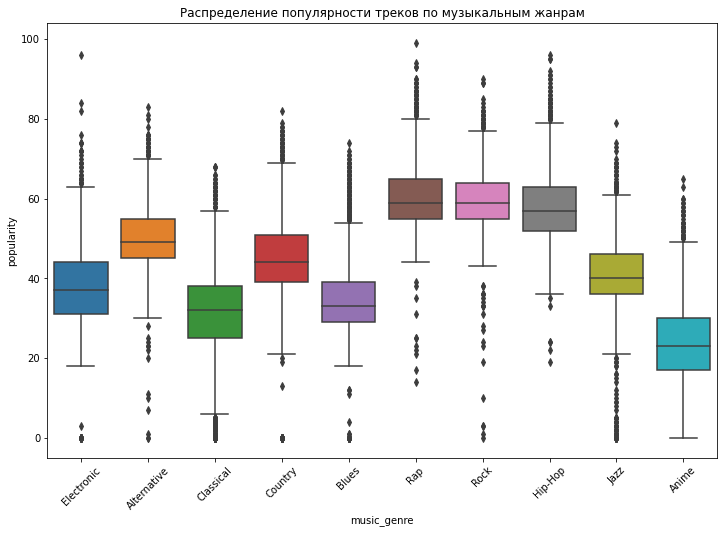

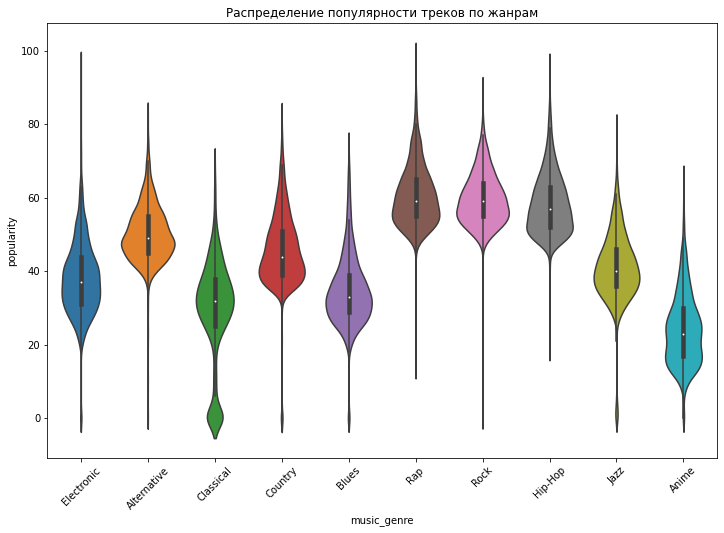

In [11]:
# Удаление строк с пропусками в столбце 'popularity'
train_clean = train.dropna(subset=['popularity'])

# Создание boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по музыкальным жанрам')
plt.show()

# Или создание violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по жанрам')
plt.show()